In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py

In [3]:
import lfpreg

In [4]:
plt.rc("figure", dpi=100)

## Load example datasets

In [5]:
data_home = "/Users/charlie/neuropixel/data"

In [6]:
# load geometry
geom = loadmat(f"{data_home}/pt_chanMap.mat")
geom = np.stack([geom["xcoords"], geom["ycoords"]], axis=1)[:, :, 0]

In [7]:
# load 60k samples (24 seconds) from a dataset
raw_a = np.memmap(f"{data_home}/pt03_full.imec0.lf.bin", dtype=np.int16).reshape(-1, 385)
raw_a = raw_a[60000:120000, :-1].astype(np.float32).T

In [8]:
# another demo dataset
with h5py.File(f"{data_home}/Pt02_full.h5") as f:
    raw_b = f["raster"][:].astype(np.float32).T

## LFP raster

In [12]:
# just channels 20-280 from this data are useful
rlfp = lfpreg.lfpraster(raw_a, geom, range(20, 280))
# also, a version with current source density for comparison
rcsd = lfpreg.lfpraster(raw_a, geom, range(20, 280), csd=True)

orig shape (384, 60000)
sub shape (384, 60000)


averaging each z:   0%|          | 0/130 [00:00<?, ?it/s]

orig shape (384, 60000)
sub shape (384, 60000)
(128, 60000, 4)


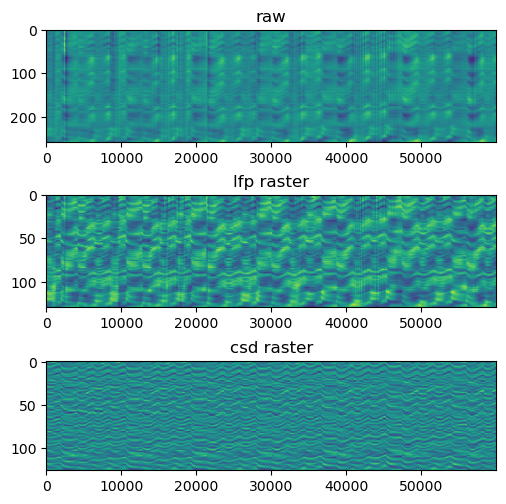

In [13]:
# plot these and the original raw data
fig, (aa, ab, ac) = plt.subplots(3, 1, figsize=(5, 5))
aa.imshow(raw_a[20:280], aspect=0.25 * 6000 / 26)
ab.imshow(rlfp, aspect=0.25 * 6000 / 13)
ac.imshow(rcsd, aspect=0.25 * 6000 / 13)
aa.set_title("raw")
ab.set_title("lfp raster")
ac.set_title("csd raster")
fig.tight_layout(pad=0.5)
plt.show()

## Registration

In [14]:
p_lfp = lfpreg.register_rigid(rlfp[:, ::5])
p_csd = lfpreg.register_rigid(rcsd[:, ::5])

  0%|          | 0/375 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

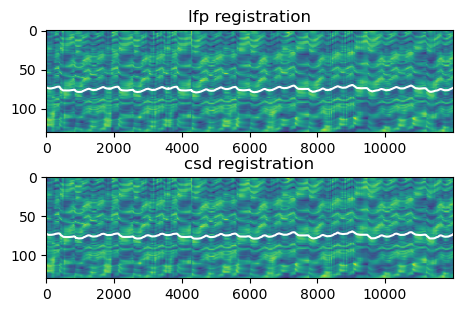

In [15]:
# plot these and the original raw data
fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 3))
aa.imshow(rlfp[:, ::5], aspect=0.25 * 1200 / 13)
ab.imshow(rlfp[:, ::5], aspect=0.25 * 1200 / 13)
aa.plot(75 + p_lfp, c="w")
ab.plot(75 + p_csd, c="w")
aa.set_title("lfp registration")
ab.set_title("csd registration")
fig.tight_layout(pad=0.5)
plt.show()

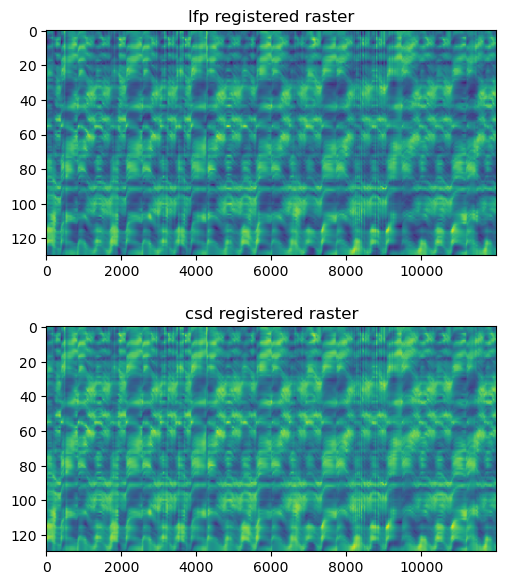

In [16]:
# compare registered rasters
reglfp = lfpreg.rigid_registered_raster(rlfp[:, ::5], p_lfp)
regcsd = lfpreg.rigid_registered_raster(rlfp[:, ::5], p_csd)
fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
aa.imshow(reglfp, aspect=0.5 * 1200 / 13)
ab.imshow(regcsd, aspect=0.5 * 1200 / 13)
aa.set_title("lfp registered raster")
ab.set_title("csd registered raster")
fig.tight_layout(pad=0.5)
plt.show()

## Another dataset, where CSD helps

In [17]:
rlfp = lfpreg.lfpraster(raw_b[:, :12000], geom, range(20,280),)
rcsd = lfpreg.lfpraster(raw_b[:, :12000], geom, range(20,280), csd=True)
p_lfp = lfpreg.register_rigid(rlfp)
p_csd = lfpreg.register_rigid(rcsd)

orig shape (384, 12000)
sub shape (384, 12000)


averaging each z:   0%|          | 0/130 [00:00<?, ?it/s]

orig shape (384, 12000)
sub shape (384, 12000)
(128, 12000, 4)


/Users/charlie/neuropixelsLFPregistration/python/pixelCSD.py:35: RuntimeWarning: Mean of empty slice
  mean_CSD = np.nanmean(CSD, 2)


  0%|          | 0/375 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

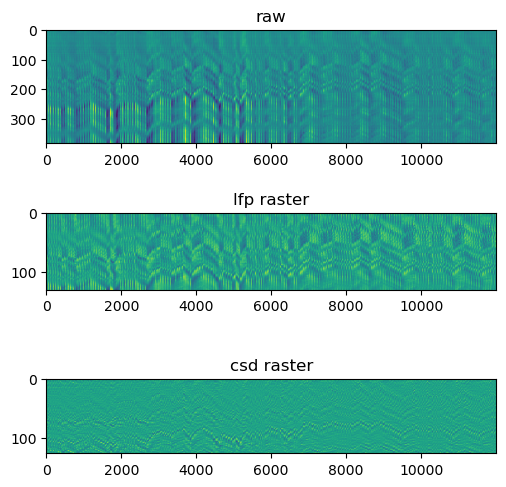

In [18]:
# plot these and the original raw data
fig, (aa, ab, ac) = plt.subplots(3, 1, figsize=(5, 5))
aa.imshow(raw_b[:, :12000], aspect=0.25 * 1200 / 38)
ab.imshow(rlfp, aspect=0.25 * 1200 / 19)
ac.imshow(rcsd, aspect=0.25 * 1200 / 19)
aa.set_title("raw")
ab.set_title("lfp raster")
ac.set_title("csd raster")
fig.tight_layout(pad=0.5)
plt.show()

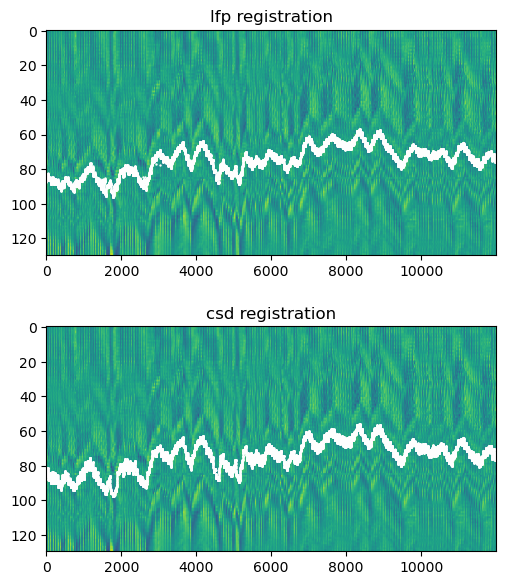

In [19]:
fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
aa.imshow(rlfp, aspect=0.5 * 1200 / 13)
ab.imshow(rlfp, aspect=0.5 * 1200 / 13)
aa.scatter(np.arange(len(p_lfp)), 75 + p_lfp, c="w", s=0.5)
ab.scatter(np.arange(len(p_lfp)), 75 + p_csd, c="w", s=0.5)
aa.set_title("lfp registration")
ab.set_title("csd registration")
fig.tight_layout(pad=0.5)
plt.show()

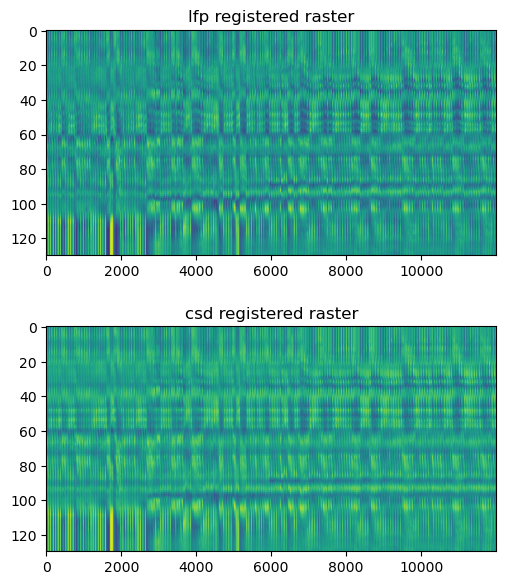

In [20]:
# compare registered rasters
reglfp = lfpreg.rigid_registered_raster(rlfp, p_lfp)
regcsd = lfpreg.rigid_registered_raster(rlfp, p_csd)
fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
aa.imshow(reglfp, aspect=0.5 * 1200 / 13)
ab.imshow(regcsd, aspect=0.5 * 1200 / 13)
aa.set_title("lfp registered raster")
ab.set_title("csd registered raster")
fig.tight_layout(pad=0.5)
plt.show()